## Train Agent on Osu Environment using Nosiy Dueling LSTM DQN

In [1]:
from environment import OsuEnvironment
from agent import DQN_Agent
from model import LSTM_DQN
import torch
import torch.nn as nn
import torch.optim as optim
import os
import warnings
import logging

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    !pip install -r yolov5/requirements.txt

warnings.simplefilter("ignore", FutureWarning)
logging.getLogger('ultralytics').setLevel(logging.ERROR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# define arguments for Agent
env = OsuEnvironment(num_frame=10)
input_size = env.observation_space.shape[1] * env.observation_space.shape[2]
dueling_dqn = True
noisy_dqn = True

policy_net = LSTM_DQN(input_size, env.action_space.nvec, dueling=dueling_dqn, noisy=noisy_dqn, num_layers=1, dropout=0).to(device)
target_net = LSTM_DQN(input_size, env.action_space.nvec, dueling=dueling_dqn, noisy=noisy_dqn, num_layers=1, dropout=0).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.SGD(policy_net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.MSELoss()

agent = DQN_Agent(env, policy_net, target_net, criterion, optimizer, noisy_dqn=noisy_dqn, lstm=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bohui/.cache\torch\hub\master.zip
YOLOv5  2024-11-22 Python-3.11.5 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Listening on 127.0.0.1:5555


In [3]:
agent.train(total_episode=500)

Epsiode: 10: Total Reward: -179.10000000000008, Loss: 8.507116627693176
Epsiode: 20: Total Reward: -163.80000000000004, Loss: 8.322606136058939
Epsiode: 30: Total Reward: -102.00000000000003, Loss: 8.174197663431583
Epsiode: 40: Total Reward: -1229.099999999999, Loss: 8.45905738657513
Epsiode: 50: Total Reward: -901.5999999999949, Loss: 8.605175254885683
Epsiode: 60: Total Reward: -522.0999999999968, Loss: 8.804397065822895
Epsiode: 70: Total Reward: -1307.0000000000018, Loss: 8.556845990816752
Epsiode: 80: Total Reward: -96.80000000000004, Loss: 9.018812840984713
Epsiode: 90: Total Reward: -269.00000000000017, Loss: 9.154596688899588
Epsiode: 100: Total Reward: -821.1999999999958, Loss: 8.805730594266759
Epsiode: 110: Total Reward: -135.20000000000005, Loss: 7.097604932011785
Epsiode: 120: Total Reward: -1948.1000000000206, Loss: 7.916975985344816
Epsiode: 130: Total Reward: -95.70000000000003, Loss: 7.011627974333586
Epsiode: 140: Total Reward: -1238.8999999999992, Loss: 6.9873533604

In [4]:
# ensure inline ploting is enable
%matplotlib inline

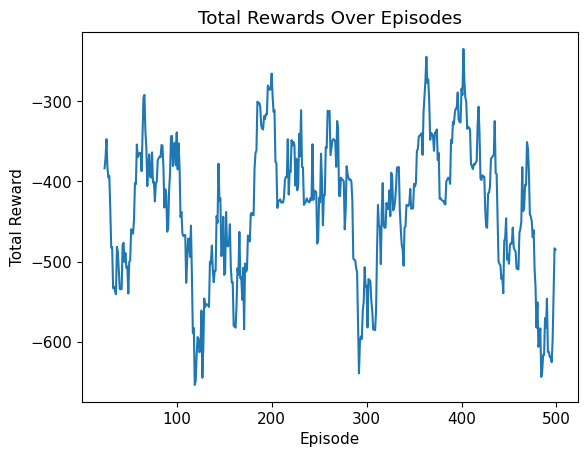

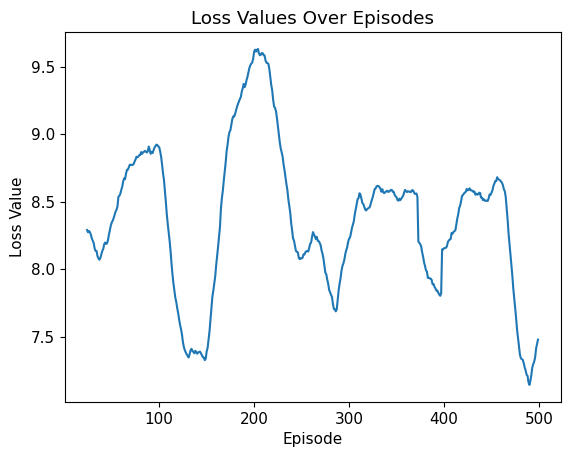

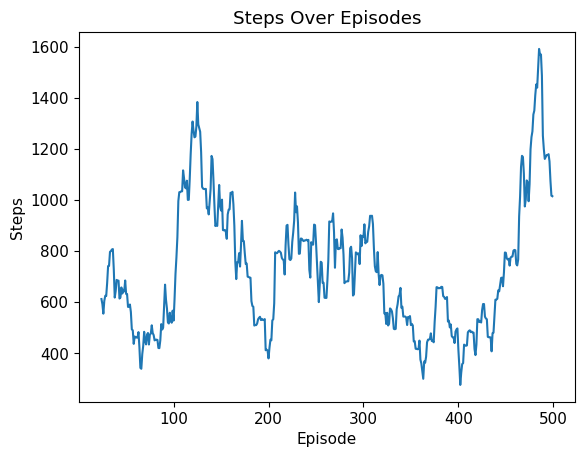

In [5]:
agent.plot()

In [7]:
agent.eval(total_episode=10)

KeyboardInterrupt: 